In [ ]:
!pip install numpy pandas matplotlib scikit-learn

Loading MNIST dataset...
Training set: 56000 samples
Test set: 14000 samples
Starting training...
Epoch 10/50, Loss: 0.1181, Accuracy: 0.9659
Epoch 20/50, Loss: 0.0619, Accuracy: 0.9831
Epoch 30/50, Loss: 0.0392, Accuracy: 0.9900
Epoch 40/50, Loss: 0.0263, Accuracy: 0.9943
Epoch 50/50, Loss: 0.0186, Accuracy: 0.9971

Training completed in 52.50 seconds.

Final Results:
Training Accuracy: 0.9972
Test Accuracy: 0.9749


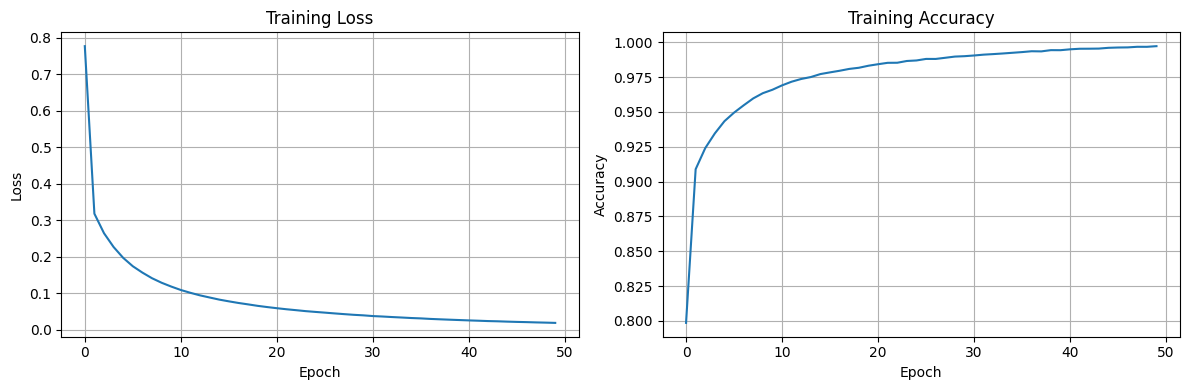


Sample Predictions:
Sample 1: Predicted = 2, Actual = 2
Sample 2: Predicted = 4, Actual = 4
Sample 3: Predicted = 7, Actual = 7
Sample 4: Predicted = 3, Actual = 3
Sample 5: Predicted = 8, Actual = 8


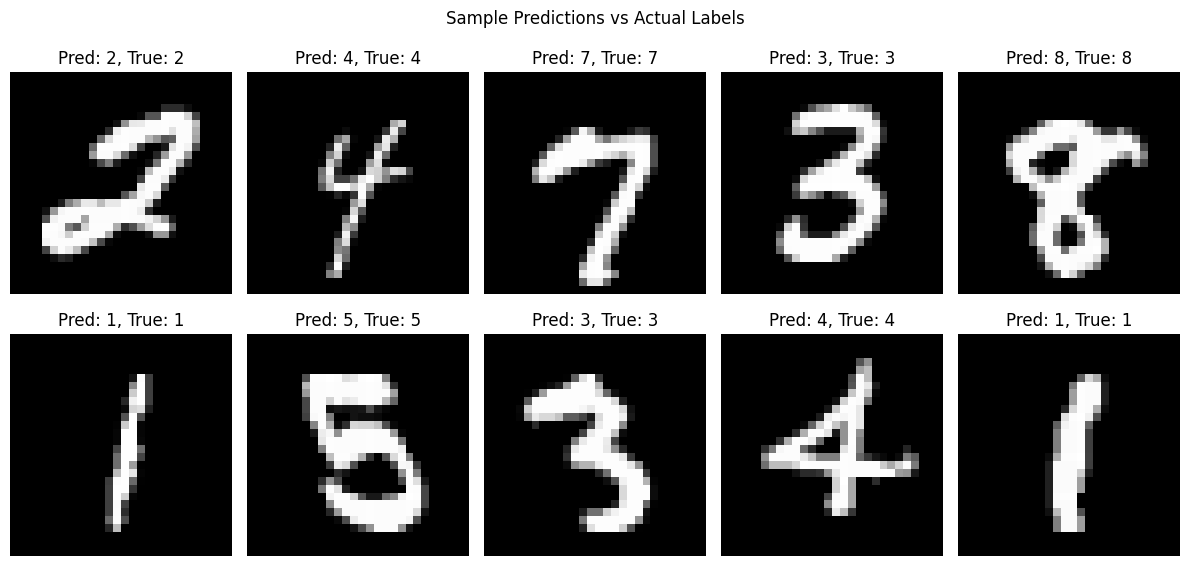


Neural Network Implementation Complete.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype(int)
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))
        self.train_losses = []
        self.train_accuracies = []
    def relu(self, z):
        return np.maximum(0, z)
    def relu_derivative(self, z):
        return (z > 0).astype(float)
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    def one_hot_encode(self, y):
        one_hot = np.zeros((y.size, self.output_size))
        one_hot[np.arange(y.size), y] = 1
        return one_hot
    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(y_true * np.log(y_pred)) / m
        return loss
    def backward_propagation(self, X, y_true, y_pred):
        m = X.shape[0]
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        return dW1, db1, dW2, db2
    def update_parameters(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    def train(self, X, y, epochs=100, batch_size=128, verbose=True):
        m = X.shape[0]
        for epoch in range(epochs):
            epoch_loss = 0
            epoch_accuracy = 0
            num_batches = 0
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0, m, batch_size):
                batch_end = min(i + batch_size, m)
                X_batch = X_shuffled[i:batch_end]
                y_batch = y_shuffled[i:batch_end]
                y_batch_onehot = self.one_hot_encode(y_batch)
                y_pred = self.forward_propagation(X_batch)
                loss = self.compute_loss(y_batch_onehot, y_pred)
                epoch_loss += loss
                predictions = np.argmax(y_pred, axis=1)
                accuracy = np.mean(predictions == y_batch)
                epoch_accuracy += accuracy
                dW1, db1, dW2, db2 = self.backward_propagation(X_batch, y_batch_onehot, y_pred)
                self.update_parameters(dW1, db1, dW2, db2)
                num_batches += 1            
            avg_loss = epoch_loss / num_batches
            avg_accuracy = epoch_accuracy / num_batches
            self.train_losses.append(avg_loss)
            self.train_accuracies.append(avg_accuracy)
            if verbose and (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}")
    def predict(self, X):
        y_pred = self.forward_propagation(X)
        return np.argmax(y_pred, axis=1)
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.1)
print("Starting training...")
start_time = time.time()
nn.train(X_train, y_train, epochs=50, batch_size=128, verbose=True)
training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds.")
train_accuracy = nn.evaluate(X_train, y_train)
test_accuracy = nn.evaluate(X_test, y_test)
print(f"\nFinal Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(nn.train_losses)
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax2.plot(nn.train_accuracies)
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
plt.tight_layout()
plt.show()
print("\nSample Predictions:")
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_predictions = nn.predict(X_test[sample_indices])
for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1}: Predicted = {sample_predictions[i]}, Actual = {y_test[idx]}")
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    idx = sample_indices[i] if i < 5 else np.random.choice(len(X_test))
    image = X_test[idx].reshape(28, 28)
    prediction = nn.predict(X_test[idx:idx+1])[0]
    actual = y_test[idx]
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Pred: {prediction}, True: {actual}')
    axes[row, col].axis('off')
plt.suptitle('Sample Predictions vs Actual Labels')
plt.tight_layout()
plt.show()
print("\nNeural Network Implementation Complete.")